In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator # Link to documentation http://amueller.github.io/word_cloud/
from PIL import Image
from nltk.corpus import stopwords
from nltk import download
#nltk.download('stopwords')
import imageio

In [2]:
# Load articles of authors
data = pd.read_csv('../Data/Data_clean_csv/clean_dataframe.csv')

with open('../Data/Data_clean_txt/Denisse Dresser.txt', 'r', encoding='utf8') as f:
    dresser_content = f.read()
    
with open('../Data/Data_clean_txt/Enrique Krauze.txt', 'r', encoding='utf8') as f:
    krauze_content = f.read()
    
with open('../Data/Data_clean_txt/John Ackerman.txt', 'r', encoding='utf8') as f:
    ackerman_content = f.read()
    
with open('../Data/Data_clean_txt/Ricardo Raphael.txt', 'r', encoding='utf8') as f:
    raphael_content = f.read()
    
with open('../Data/Data_clean_txt/Valeria Moy.txt', 'r', encoding='utf8') as f:
    moy_content = f.read()

In [3]:
# Update stopwords in Spanish
spanish_stopwords = stopwords.words('spanish')

additional_words = ['si', 'así', 'sólo', 'tras', 'cómo', 'ello', 'cada', 'ser', 'solo', 'tan' ,'sino', 'b', 'ricardoraphael', 'ciento']

for word in additional_words:
    if word not in spanish_stopwords:
        spanish_stopwords.append(word)
        
STOPWORDS.update(spanish_stopwords)

# Word cloud

In [4]:
def create_wordcloud(author, path_png_image, colormap='default'):
    
    """
    Creates a WordCloud based on the articles of an author:
    - author: accepts "dresser", "krauze", "ackerman", "raphael", or "moy"
    - png_image: uses the contour of the image of the author
    - image_colors: 'default' for image colors or use matplotlib colormap: https://matplotlib.org/stable/gallery/color/colormap_reference.html
    """
    
    # Get author data
    if author == 'dresser':
        author_data = dresser_content
    elif author == 'krauze':
        author_data = krauze_content
    elif author == 'ackerman':
        author_data = ackerman_content
    elif author == 'raphael':
        author_data = raphael_content
    elif author == 'moy':
        author_data = moy_content
    else:
        print('Please write the name of a valid author')
        return
    
    # Import image of mask on RGB format
    mask = np.array(imageio.imread(f'PNG Images/{path_png_image}', pilmode='RGBA'))
    
    # Change white background (0's) to black (255's).
    transformed_mask = np.where(mask==0, 255, mask)
    
    # Create and generate WordCloud
    if colormap == 'default':
        color_map = 'viridis'
    
    wordcloud = WordCloud(width = 3000, height = 2000, random_state=1,
                      contour_width=3, contour_color='grey',
                      background_color='white', colormap=color_map,
                      collocations=False, stopwords = STOPWORDS, mask=transformed_mask)
    
    wordcloud.generate(author_data)
    
    # Display WordCloud
    plt.figure(figsize=(15, 15))
    
    ### Create coloring from image
    if colormap == 'default':
        mask_rgba = imageio.imread(f'PNG Images/{path_png_image}', pilmode='RGBA')
        image_colors = ImageColorGenerator(mask_rgba)
        wordcloud.recolor(color_func=image_colors)
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
        
    else:
        plt.imshow(wordcloud ,interpolation="bilinear")
      
    plt.axis("off")
    plt.show()

# Examples

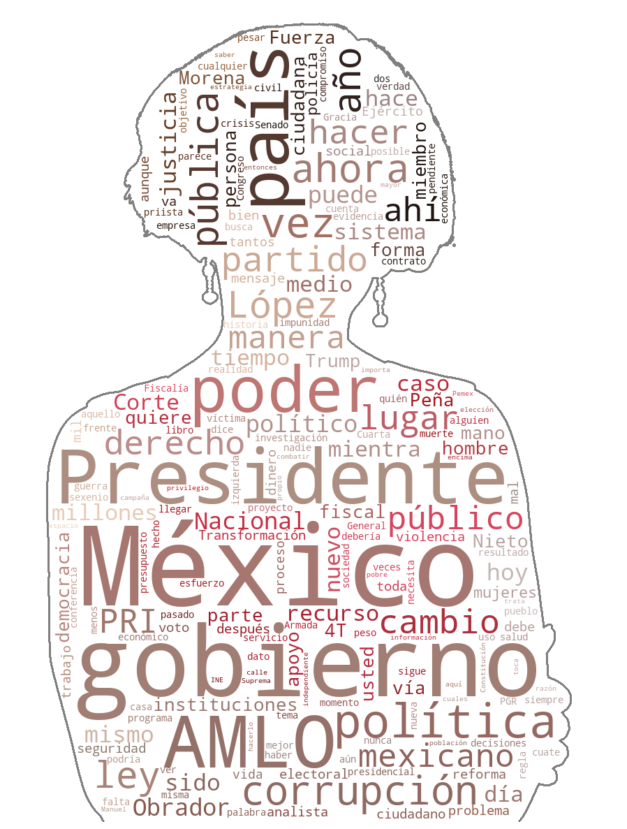

In [5]:
create_wordcloud('dresser', 'dresser.png', colormap='default')

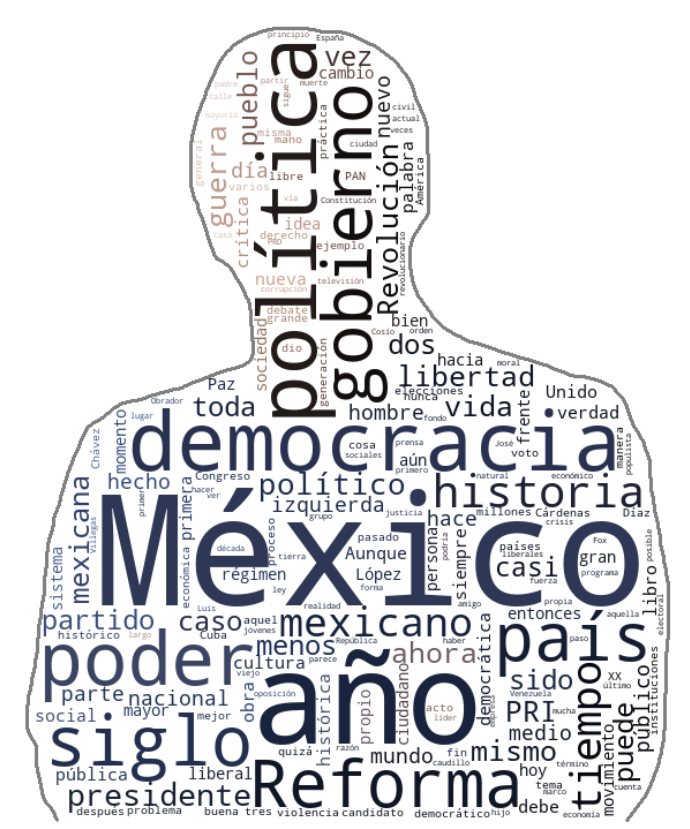

In [6]:
create_wordcloud('krauze', 'krauze.png', colormap='default')

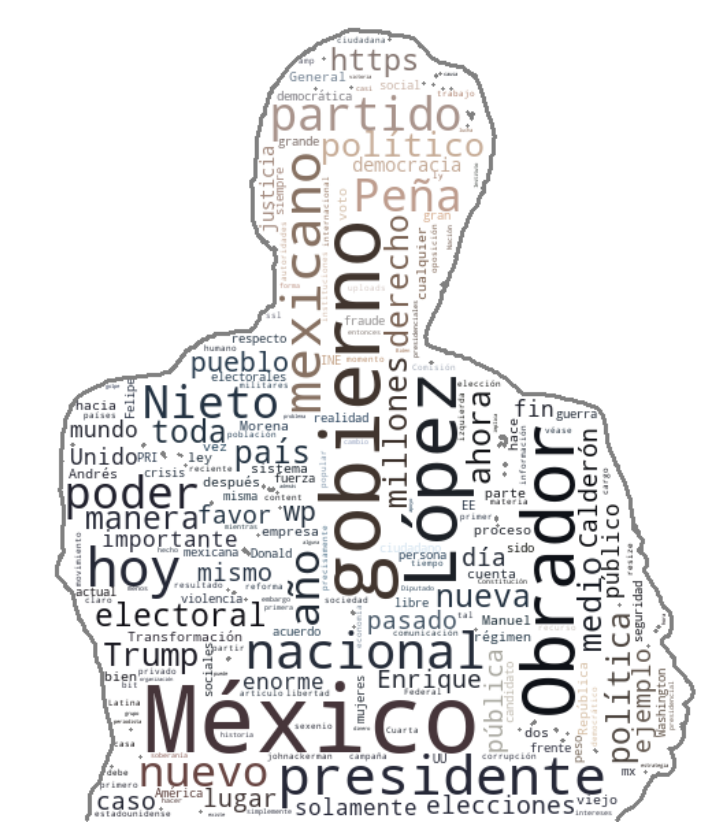

In [7]:
create_wordcloud('ackerman', 'ackerman.png', colormap='default')

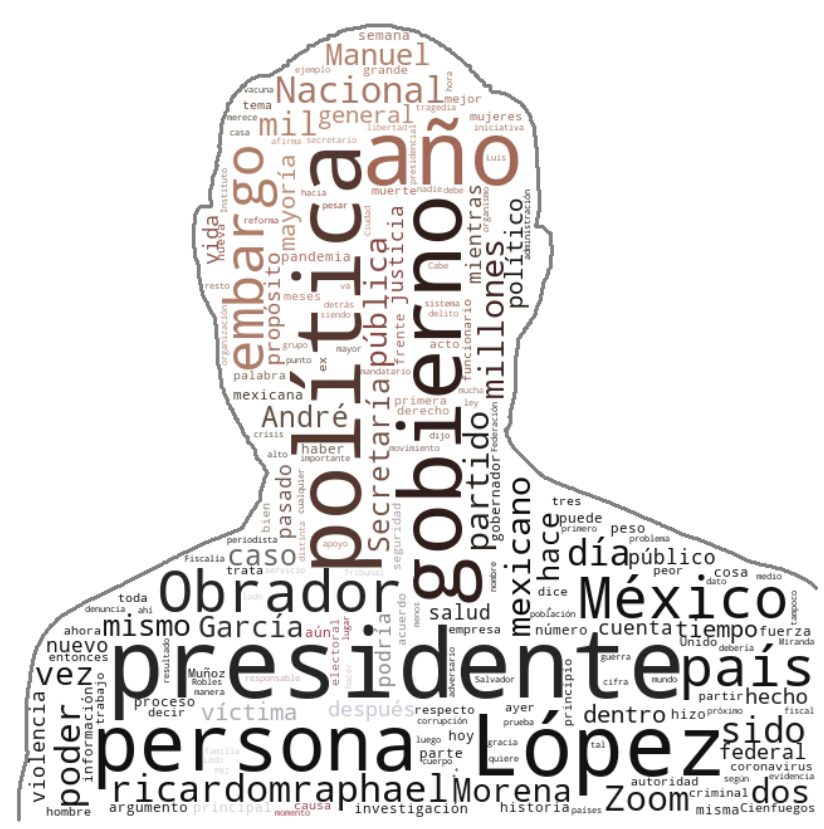

In [8]:
create_wordcloud('raphael', 'raphael.png', colormap='default')

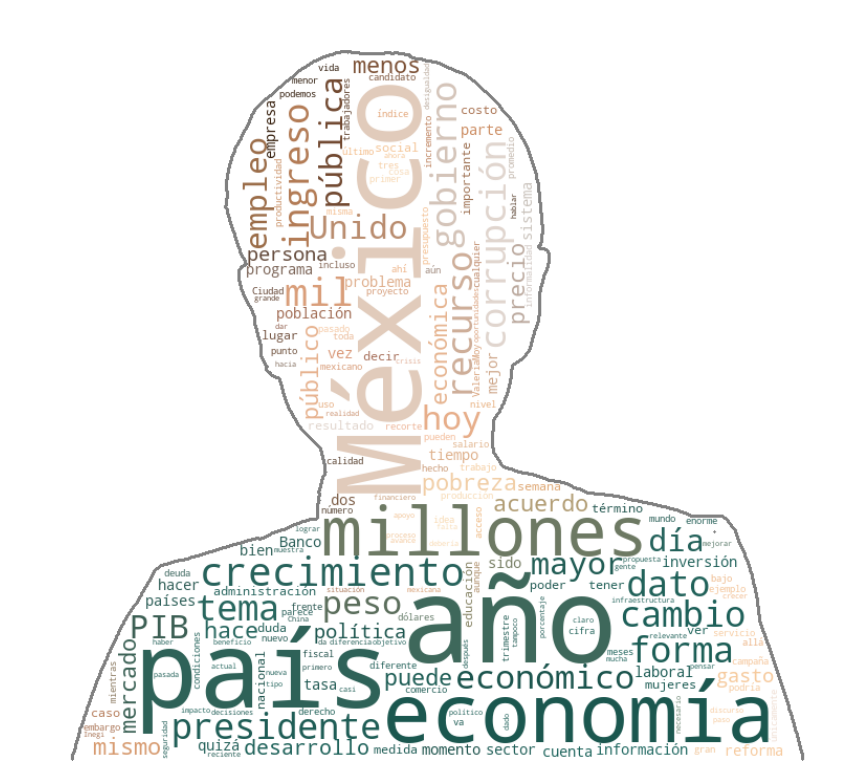

In [9]:
create_wordcloud('moy', 'moy.png', colormap='default')